In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('words')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phupham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/phupham/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [8]:
df_user=pd.read_csv('yelp_user.csv')

In [7]:
df_review.head(5)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [9]:
df_user_groupby=pd.DataFrame(columns=['date','count'])

In [ ]:
df_user_groupby['date']=df_review.groupby('date')

In [10]:
df_user_groupby['count']=df_review.groupby('date')['text'].count()

In [13]:
df_user_groupby['date']=df_user_groupby.index

In [16]:
df_user_groupby.to_csv('df_groupby.csv')

In [18]:
df_review.shape

(5261668, 9)

In [12]:
df=df_review.iloc[0:11000,]

In [14]:
df.to_csv('review_part.csv')

In [29]:
df_yb.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [20]:
df.groupby(['stars']).count()

,review_id,user_id,business_id,date,text,useful,funny,cool
stars,,,,,,,,
1,1000,1000,1000,1000,1000,1000,1000,1000
2,974,974,974,974,974,974,974,974
3,1813,1813,1813,1813,1813,1813,1813,1813
4,3238,3238,3238,3238,3238,3238,3238,3238
5,3975,3975,3975,3975,3975,3975,3975,3975


In [25]:
df_merge=df.merge(df_yb, how='left', left_on='business_id', right_on='business_id')

In [31]:
df_merge.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'date', 'text',
       'useful', 'funny', 'cool', 'name', 'neighborhood', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'stars_y',
       'review_count', 'is_open', 'categories'],
      dtype='object')

In [33]:
df_merge=df_merge[['review_id', 'user_id', 'business_id', 'stars_x', 'date', 'text',
       'useful', 'funny', 'cool','categories']]

In [40]:
df_merge['categories']=df_merge['categories'].str.lower()

# START

In [3]:
df_subset=pd.read_csv('yelp_review_subset_process.csv')

In [6]:
df_group=df_subset.groupby(['cat_class']).count().reset_index()

In [7]:
df_group.head()

,cat_class,stars,date,text,useful,funny,cool
0,Arts & Entertainment,350,350,350,350,350,350
1,Cafe,371,371,371,371,371,371
2,Hotel,391,391,391,391,391,391
3,Restaurant,6985,6985,6985,6985,6985,6985
4,Salon,299,299,299,299,299,299


<BarContainer object of 5 artists>

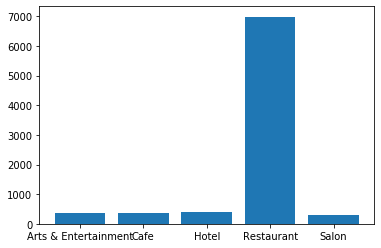

In [14]:
plt.bar(df_group['cat_class'], df_group['text'], width=0.8)

In [27]:
for i in range(len(df_subset)):
    df_subset['text_len'][i]=len(df_subset['text'][i])

In [28]:
df_subset.head()

,stars,date,text,useful,funny,cool,cat_class,text_len
0,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,Restaurant,213
1,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,Restaurant,502
2,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,Restaurant,373
3,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,Restaurant,523
4,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,Restaurant,231


In [29]:
df_subset['text_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [18]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [251]:
df_restaurant=df_subset[df_subset['cat_class']=='Restaurant']

In [252]:
index_list=[i for i in range(df_restaurant.shape[0])]
df_restaurant.index=index_list

In [253]:
review_df_res=[]
for line in df_restaurant['text']:
    review_df_res.append(line.strip())

In [254]:
processed_features_df = []

for sentence in range(0, len(review_df_res)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(review_df_res[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features_df.append(processed_feature)

In [255]:
#Remove Stopwords
number_stopword=[]
number_i_me=[]
def remove_stopwords(texts):
    stop_words=stopwords.words('english')
    '''
    {‘ourselves’, ‘hers’, ‘between’, ‘yourself’, ‘but’, ‘again’, ‘there’, ‘about’, ‘once’, 
    ‘during’, ‘out’, ‘very’, ‘having’, ‘with’, ‘they’, ‘own’, ‘an’, ‘be’, ‘some’, ‘for’, ‘do’, 
    ‘its’, ‘yours’, ‘such’, ‘into’, ‘of’, ‘most’, ‘itself’, ‘other’, ‘off’, ‘is’, ‘s’, ‘am’, 
    ‘or’, ‘who’, ‘as’, ‘from’, ‘him’, ‘each’, ‘the’, ‘themselves’, ‘until’, ‘below’, ‘are’, 
    ‘we’, ‘these’, ‘your’, ‘his’, ‘through’, ‘don’, ‘nor’, ‘me’, ‘were’, ‘her’, ‘more’, ‘himself’, 
    ‘this’, ‘down’, ‘should’, ‘our’, ‘their’, ‘while’, ‘above’, ‘both’, ‘up’, ‘to’, ‘ours’, ‘had’, 
    ‘she’, ‘all’, ‘no’, ‘when’, ‘at’, ‘any’, ‘before’, ‘them’, ‘same’, ‘and’, ‘been’, ‘have’, ‘in’, 
    ‘will’, ‘on’, ‘does’, ‘yourselves’, ‘then’, ‘that’, ‘because’, ‘what’, ‘over’, ‘why’, ‘so’, ‘can’, 
    ‘did’, ‘not’, ‘now’, ‘under’, ‘he’, ‘you’, ‘herself’, ‘has’, ‘just’, ‘where’, ‘too’, ‘only’, ‘myself’, 
    ‘which’, ‘those’, ‘i’, ‘after’, ‘few’, ‘whom’, ‘t’, ‘being’, ‘if’, ‘theirs’, ‘my’, ‘against’, ‘a’, ‘by’, 
    ‘doing’, ‘it’, ‘how’, ‘further’, ‘was’, ‘here’, ‘than’}
    '''
    stop_words.extend(['from','say','one','must','à¹','dont','ok','okay','meh','ever',
                      'first', 'movie', 'film', 'really', 'make', 'much', 'even', 'alway', 'made', 'another', 'better',
                      'see', 'still', 'way', 'part', 'liked', 'thing', 'good', 'well', 'and', 'end', 'go', 'come', 'lot', 'actually',
                      'seen','bit','though','done'])
    i_me=['i','me']
    for doc in texts:
        count_stop=0
        count_number_i_me=0
        for word in simple_preprocess(str(doc)):
            if word in(stop_words):
                count_stop+=1
            if word in(i_me):
                count_number_i_me+=1
        number_stopword.append(0) if count_stop==0 else number_stopword.append(count_stop)
        number_i_me.append(0) if count_number_i_me==0 else number_i_me.append(count_number_i_me)
            
                
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
    

In [256]:
processed_features_df_new=remove_stopwords(processed_features_df)

In [257]:
len(number_stopword)

6985

In [258]:
len(processed_features_df_new)

6985

In [261]:
df_restaurant['number_stopwords']=0
df_restaurant['number_i_me']=0
df_restaurant['text_cleaned']=processed_features_df_new
df_restaurant['number_stopwords']=number_stopword
df_restaurant['number_i_me']=number_i_me



/Users/phupham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/phupham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/phupham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [262]:
df_restaurant.head()

,stars,date,text,useful,funny,cool,cat_class,number_stopwords,number_i_me,text_cleaned
0,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,Restaurant,17,0,"[super, simple, place, amazing, nonetheless, a..."
1,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,Restaurant,40,0,"[small, unassuming, place, changes, menu, ever..."
2,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,Restaurant,39,0,"[lester, located, beautiful, neighborhood, sin..."
3,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,Restaurant,50,0,"[love, coming, yes, place, always, needs, floo..."
4,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,Restaurant,22,0,"[chocolate, almond, croissant, amazing, light,..."


In [263]:
df_restaurant['stopwords_ratio']=(df_restaurant['number_stopwords']/len(df_restaurant['text']))*100

/Users/phupham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [264]:
df_restaurant.describe()

,stars,useful,funny,cool,number_stopwords,number_i_me,stopwords_ratio
count,6985.000000,6985.000000,6985.000000,6985.000000,6985.000000,6985.000000,6985.000000
mean,3.700358,1.399284,0.596564,0.738296,61.374946,0.387831,0.878668
std,1.218642,2.556167,1.740508,1.911097,56.041057,0.836794,0.802306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.329277
50%,4.000000,1.000000,0.000000,0.000000,44.000000,0.000000,0.629921
75%,5.000000,2.000000,0.000000,1.000000,82.000000,1.000000,1.173944
max,5.000000,47.000000,29.000000,40.000000,467.000000,9.000000,6.685755


In [265]:
df_date=df_restaurant.groupby(['date']).agg({'text':'count'}).reset_index()
df_date.rename(columns={'text':'number_this_day'}, inplace=True)

In [266]:
df_date.head()

,date,number_this_day
0,2005-11-26,2
1,2006-01-13,2
2,2006-01-14,2
3,2006-03-02,1
4,2006-03-05,1


In [267]:
df_restaurant=df_restaurant.merge(df_date,how='left',left_on='date', right_on='date')

In [268]:
df_restaurant.head(10)

,stars,date,text,useful,funny,cool,cat_class,number_stopwords,number_i_me,text_cleaned,stopwords_ratio,number_this_day
0,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,Restaurant,17,0,"[super, simple, place, amazing, nonetheless, a...",0.243379,6
1,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,Restaurant,40,0,"[small, unassuming, place, changes, menu, ever...",0.572656,6
2,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,Restaurant,39,0,"[lester, located, beautiful, neighborhood, sin...",0.558339,6
3,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,Restaurant,50,0,"[love, coming, yes, place, always, needs, floo...",0.715820,6
4,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,Restaurant,22,0,"[chocolate, almond, croissant, amazing, light,...",0.314961,6
5,4,2012-05-11,Who would have guess that you would be able to...,0,0,2,Restaurant,54,2,"[would, guess, would, able, get, fairly, decen...",0.773085,9
6,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0,Restaurant,21,0,"[bad, love, gluten, free, vegan, version, chee...",0.300644,4
7,4,2013-05-01,This is currently my parents new favourite res...,1,0,0,Restaurant,35,0,"[currently, parents, new, favourite, restauran...",0.501074,4
8,3,2011-09-28,Server was a little rude.\n\nOrdered the calam...,5,0,1,Restaurant,9,0,"[server, little, rude, ordered, calamari, duck...",0.128848,6
9,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,Restaurant,63,0,"[wanted, check, place, due, hype, heard, frien...",0.901933,2


In [269]:
df_restaurant['fake_or_not']=(df_restaurant['number_i_me']>7).astype(int)
df_restaurant['fake_or_not']=(df_restaurant['stopwords_ratio']>3.0).astype(int)
df_restaurant['fake_or_not']=(df_restaurant['number_this_day']>30).astype(int)

In [270]:
df_restaurant.to_csv('yelp_restaurant_cleaned_1.csv')

In [271]:
df_restaurant.head()

,stars,date,text,useful,funny,cool,cat_class,number_stopwords,number_i_me,text_cleaned,stopwords_ratio,number_this_day,fake_or_not
0,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,Restaurant,17,0,"[super, simple, place, amazing, nonetheless, a...",0.243379,6,0
1,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,Restaurant,40,0,"[small, unassuming, place, changes, menu, ever...",0.572656,6,0
2,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,Restaurant,39,0,"[lester, located, beautiful, neighborhood, sin...",0.558339,6,0
3,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,Restaurant,50,0,"[love, coming, yes, place, always, needs, floo...",0.715820,6,0
4,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,Restaurant,22,0,"[chocolate, almond, croissant, amazing, light,...",0.314961,6,0
